# Lab 9 - Network Data Analytics
## 3. Information Diffusion

It is also known as graph activation process, e.g. http://ncase.me/crowds/

Further readings:
+ https://stackoverflow.com/questions/31815454/animate-graph-diffusion-with-networkx
+ https://stackoverflow.com/questions/27475211/animating-a-network-graph-to-show-the-progress-of-an-algorithm/

34

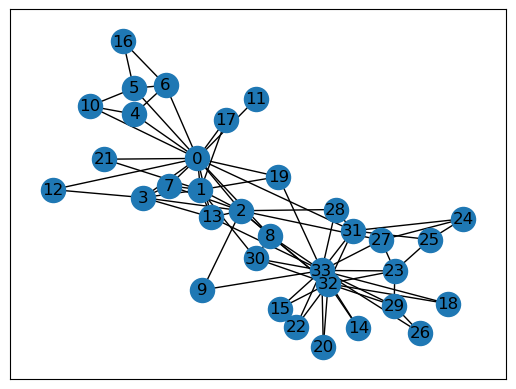

In [1]:
from __future__ import print_function, division
%matplotlib inline

import networkx as nx
import numpy as np

G = nx.karate_club_graph()
nx.draw_networkx(G, with_labels=True)
len(G.nodes)

### 3.1. Diffusion process
Now we implement the diffusion process. Each active node will cause other nodes in the graph to become active over time. The diffusion rule is that a node gets active if at least a certain percentage of its neighbors become active. The process continues until convergence (i.e. has no new node activated).

OPTIONAL: Can you implement a data visualization to illustrate the diffusion proceess?

In [2]:
def diffusion(graph, seed_set, thr=0.5):
    active = seed_set
    has_changed = False
    
    # TODO: loop through not active nodes and activate a node of more than "thr" percent of its neighbors are active
    for n in filter(lambda n: n not in active, graph.nodes()):
        if len(list(filter(lambda neighbor: neighbor in active, graph.neighbors(n)))) >= thr * len(list(graph.neighbors(n))):
            active.add(n)
            has_changed = True
    if has_changed:
        return diffusion(graph, active, thr) # union of two sets
    return active

diffusion(G, {0,1})

{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21}

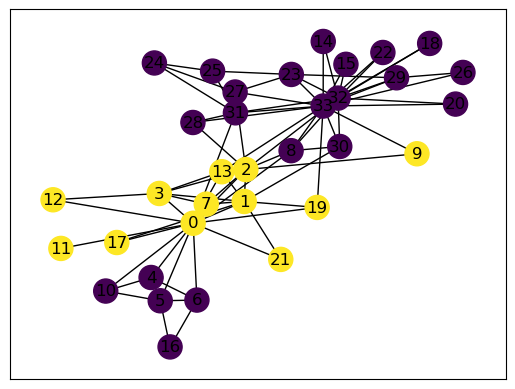

In [3]:
active_nodes = diffusion(G, {0,1})
cmap = []
for n in G.nodes:
    if n in active_nodes:
        cmap.append(1)
    else:
        cmap.append(0)
        
nx.draw_networkx(G, node_color = cmap, with_labels = True)

### 3.2. Influence Maximization

Now we find a minimal set of seeds that maximize the influence (i.e. the number of active nodes). The influence maximization problem is NP-hard in general. Here, we use greedy algorithm which iteratively chooses a seed such that the gain of influence is maximal.

In [4]:
def utility(graph, seeds, thr=0.5):
    return len(diffusion(graph, seeds.copy(), thr))

def greedy(graph, k=3, thr=0.5):
    seeds = set()
    for i in range(k):
        max_gain = 0
        chosen_seed = -1
        
        # TODO: greedily choose the node as seed with maximal utility gain
        for n in graph.nodes():
            gain = utility(graph, seeds | {n}) - utility(graph, seeds)
            if gain > max_gain:
                max_gain =  gain
                chosen_seed = n
                
        if max_gain > 0:
            seeds = seeds | {chosen_seed}
        else:
            break
    return seeds

seeds = greedy(G,3)
print(seeds)
print(utility(G, seeds))

{0, 33, 4}
34


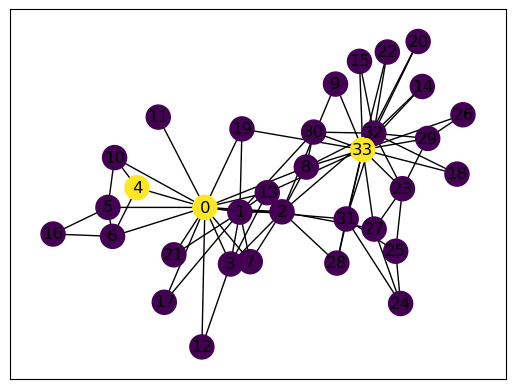

In [5]:
active_nodes = seeds
cmap = []
for n in G.nodes:
    if n in active_nodes:
        cmap.append(1)
    else:
        cmap.append(0)
        
nx.draw_networkx(G, node_color = cmap, with_labels = True)

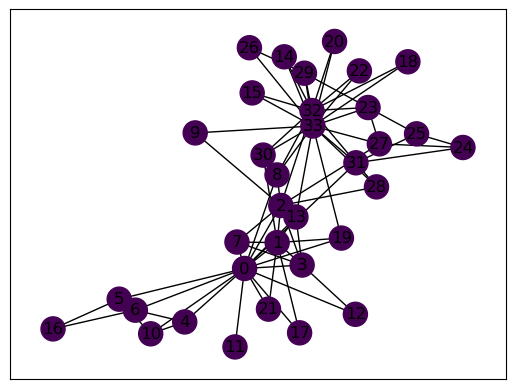

In [6]:
active_nodes = diffusion(G, seeds)
cmap = []
for n in G.nodes:
    if n in active_nodes:
        cmap.append(1)
    else:
        cmap.append(0)
        
nx.draw_networkx(G, node_color = cmap, with_labels = True)